# The Permutation Test

The "permutation test" is a nonparametric hypothesis test which assess whether two different subpopulations, $A$ and $B$, are different by some metric, e.g. the mean/medians of two subpopulations. This test originates in (no surprise) Fisher's work in the thirties.

As a toy example that arises in practice, let's say we have a table where each row is an individual, and one column takes one of two possible values, called "$A$" or "$B$". Note that a priori, this column might be utterly meaningless in terms of the context at hand. Moreover, for practical reasons, we want to limit the number of . In other words, we want to "make it hard" to establish that there is a statistically significant difference between these two subpopulations. 

Therefore, the null hypothesis asserts that these two subpopulations are indistinguishable. In other words, the designation of whether a sample was in population $A$ and $B$ were completely arbitrary. 

If we're going to test this hypothesis, we need to enter into the realm where the null hypothesis was true. In this world, $A$ and $B$ were "from the same population." Moreover, any differences come from the randomness contained in splitting this singular population into two groups (of potentially different sizes.

Therefore, in order to test this hypothesis, we need to simulate splitting the population into two groups ("$A$" and "$B$"), and examine the differences ("$B-A$") between the metric (i.e. test statistic) of these two groups. As in the case with most hypothesis tests, this generates a distribution by looking at the difference of our metrics between group . 

Let's say our alternative hypothesis is that $B$ is better than $A$. In this case, we are trying to show that a statistically insignificant amount of differences generated by the null distribution are greater than the observed difference. Therefore, the p-value associated to the observed difference in the subpopulations is then the number of simulated differences which are greater than the observed differences divided by the number of simulated differences. 

The "permutation" part of the name is a bit unfortunate, as it hides the underlying intent and logic of the test. It refers to one way of generating splittings of the pooled sample. In lieu of going through the details of how this generation is accomplished, I've included a code implementing this test below.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [86]:
def mean_perm_test(A, B, n_perm):
    # pool the samples
    AB = np.concatenate([A, B])
    # replace them n_perm times
    AB_tile = np.tile(AB, (n_perm, 1))
    diff = B.mean() - A.mean()
    AB_perm = np.apply_along_axis(np.random.permutation, axis=1, arr=AB_tile)
    # Split into new A's and B's
    A_perm = AB_perm[:, 0:A.shape[0]]
    B_perm = AB_perm[:, A.shape[0]:]
    emp_dist = A_perm.mean(axis=1) - B_perm.mean(axis=1)

    p_val = (np.abs(emp_dist) >= np.abs(diff)).sum() / n_perm
    return [emp_dist, p_val, diff]

And now for an 

### Example

Here $A$ is 40 integers randomly sampled from a uniform distribution on $[0, 9)$, and $B$ is 50 integers generated from the a uniform distribution on $[0, 14)$.

Hopefully, the permutation tests rejects the null in favor of the alternative

In [87]:
A = np.random.randint(0, 10, 20)
B = np.random.randint(0, 15, 30)

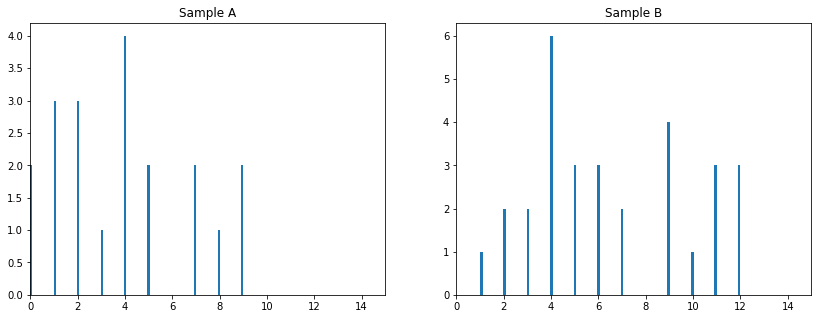

In [88]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].hist(A, bins=10 ** 2)
ax[0].set(xlim=(0, 15), title="Sample A")
ax[1].hist(B, bins=10 ** 2)
ax[1].set(xlim=(0, 15), title="Sample B");

The p-value of this test is: 0.006


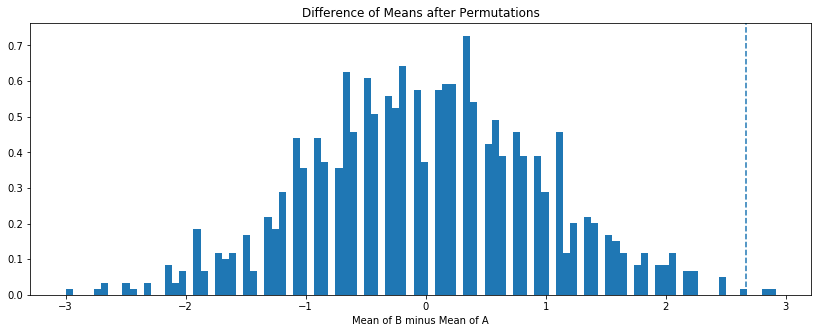

In [89]:
emp_dist, p_val, diff = mean_perm_test(A, B, 10 ** 3)

fig, ax = plt.subplots(1, 1, figsize=(14, 5))

ax.hist(emp_dist, bins=10 ** 2, density=True)
ax.axvline(diff, linestyle="dashed")
ax.set(title = "Difference of Means after Permutations", xlabel = 'Mean of B minus Mean of A')
print('The p-value of this test is:', p_val)

As a sanity check, let's see what happens when $A$ and $B$ "really are the same":

In [67]:
A0 = np.random.randint(0, 10, 30)
B0 = np.random.randint(0, 10, 25)

The p-value of this test is: 0.282


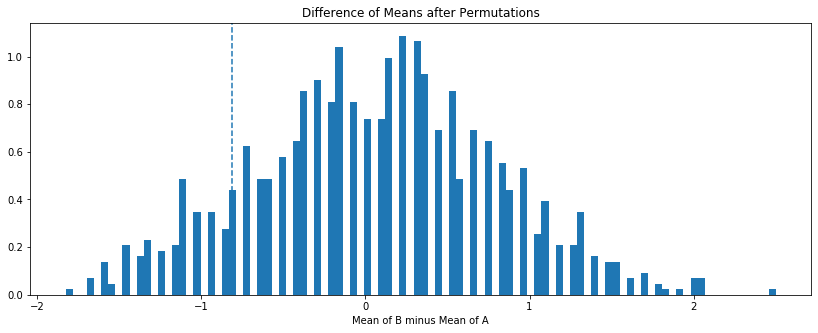

In [91]:
emp_dist, p_val, diff = mean_perm_test(A0, B0, 10 ** 3)

fig, ax = plt.subplots(1, 1, figsize=(14, 5))

ax.hist(emp_dist, bins=10 ** 2, density=True)
ax.axvline(diff, linestyle="dashed")
ax.set(title = "Difference of Means after Permutations", xlabel = 'Mean of B minus Mean of A')
print('The p-value of this test is:', p_val)

At least when I ran the code, the result was statistically insignficant and I failed to reject the null. 

Let's see what the two-sample t-test with unequal variance says:

In [72]:
print(stats.ttest_ind(A, B, equal_var = False)[1])
print(stats.ttest_ind(A0, B0, equal_var = False)[1])

0.0340766771698838
0.2725353887999827


Note that although these two tests (more less) coincide (at least when I ran the code), note that this (and all) variants of the t-test only work when the test statistic (i.e. the metric) is the mean. 

The permutation test however (in principle) works for any test statistic! Like most other nonparametric methods, this is the area the permutation test really shines. 